# Set up: Load Libraries, Images, Atlases, Patient Data

In [6]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sk

import nibabel as nib

In [7]:
# load csv file containing neuropsych data
df_neuropsych = pd.read_csv('/home/forest/OneDrive/CLMS_OTHER_DATA/CLMS_SUMMARIZED.csv')

In [8]:
df_neuropsych.columns

Index(['SUBJECT', 'COG_TEST_DATE', 'HANDEDNESS', 'HANDEDNESS_DEGREE',
       'HAND_SCORE', 'LTT_LH_MEAN_CORRECT', 'LTT_LH_TOTAL_ERRORS',
       'LTT_RH_MEAN_CORRECT', 'LTT_RH_TOTAL_ERRORS',
       'LTT_IN_PHASE_MEAN_CORRECT', 'LTT_OUT_PHASE_MEAN_CORRECT', 'BIRTHDATE',
       'AGE_YRS', 'EDU_YRS', 'HEIGHT_CM', 'WEIGHT_KG', 'SEX$', 'SDMT_Z_SCO',
       'WAIS3_DSC_RAWSCORE', 'WAIS3_DSC_SS', 'WAIS3_SYMS_RAWSCORE',
       'WAIS3_SYMS_SS', 'WAIS3_TOT_SCORE', 'WAIS2_PSI_SCORE',
       'WAIS3_PSI_PERCENTILE', 'MFIS_TOTAL', 'MFIS_PHYSICAL', 'MFIS_COGNITIVE',
       'MFIS_PSYCHOSOCIAL', 'BDI-II_SCORE', 'BDI_CLASS', 'TOL2_MOVE_SS',
       'TOL2_CORECT_SS', 'TOL2_RUV_SS', 'TOL2_TIV_SS', 'TOL2_INIT_SS',
       'TOL2_EXEC_SS', 'TOL2_PRS_SS', 'TOL2_OVERALL_SS', 'PASAT2_3SEC_ZSCO',
       'PASAT2_2SEC_ZSCO', 'GROUP$', 'MS_TYPE$', 'EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL'],
      dtype='object')

In [2]:
# load freesurfer cortical thickness data


In [3]:
# load preprocessed fMRI data (final nifti files, filepath only)

In [4]:
# combine everything into one dataframe

In [5]:
# load regions of interest from atlas

In [4]:
df_neuropsych.head(5)

,SUBJECT,COG_TEST_DATE,HANDEDNESS,HANDEDNESS_DEGREE,HAND_SCORE,LTT_LH_MEAN_CORRECT,LTT_LH_TOTAL_ERRORS,LTT_RH_MEAN_CORRECT,LTT_RH_TOTAL_ERRORS,LTT_IN_PHASE_MEAN_CORRECT,...,GROUP$,MS_TYPE$,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,ABC_001,2015-11-04,Left,Strongly,77,111.0,1,110.5,6,31.0,...,MS,SPMS,3,1,0,2,1,2,1,0
1,BCD_002,2015-11-23,Right,Strongly,18,120.0,0,132.0,5,82.5,...,MS,SPMS,5.5,1,1,4,3,3,2,1
2,CDE_003,2015-11-30,Right,Strongly,18,113.5,1,142.5,6,89.5,...,MS,RRMS,1,0,0,0,0,1,0,0
3,DEF_004,2015-11-19,Right,Strongly,20,76.5,0,89.5,0,43.0,...,MS,SPMS,6.5,1,2,5,3,3,1,1
4,EFG_005,2015-11-26,Left,Moderately,50,79.5,4,52.5,1,34.5,...,MS,SPMS,4,0,1,3,2,2,1,0


# Neuropsych & Structural Data Statistics

In [28]:
df_neuropsych.columns

Index(['SUBJECT', 'COG_TEST_DATE', 'HANDEDNESS', 'HANDEDNESS_DEGREE',
       'HAND_SCORE', 'LTT_LH_MEAN_CORRECT', 'LTT_LH_TOTAL_ERRORS',
       'LTT_RH_MEAN_CORRECT', 'LTT_RH_TOTAL_ERRORS',
       'LTT_IN_PHASE_MEAN_CORRECT', 'LTT_OUT_PHASE_MEAN_CORRECT', 'BIRTHDATE',
       'AGE_YRS', 'EDU_YRS', 'HEIGHT_CM', 'WEIGHT_KG', 'SEX$', 'SDMT_Z_SCO',
       'WAIS3_DSC_RAWSCORE', 'WAIS3_DSC_SS', 'WAIS3_SYMS_RAWSCORE',
       'WAIS3_SYMS_SS', 'WAIS3_TOT_SCORE', 'WAIS2_PSI_SCORE',
       'WAIS3_PSI_PERCENTILE', 'MFIS_TOTAL', 'MFIS_PHYSICAL', 'MFIS_COGNITIVE',
       'MFIS_PSYCHOSOCIAL', 'BDI-II_SCORE', 'BDI_CLASS', 'TOL2_MOVE_SS',
       'TOL2_CORECT_SS', 'TOL2_RUV_SS', 'TOL2_TIV_SS', 'TOL2_INIT_SS',
       'TOL2_EXEC_SS', 'TOL2_PRS_SS', 'TOL2_OVERALL_SS', 'PASAT2_3SEC_ZSCO',
       'PASAT2_2SEC_ZSCO', 'GROUP$', 'MS_TYPE$', 'EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL'],
      dtype='object')

In [132]:
# all-group metrics
order=['HC', 'RRMS', 'SPMS']
palette = ['#009ADE', '#FFC61E', '#E9002D']
data=df_neuropsych

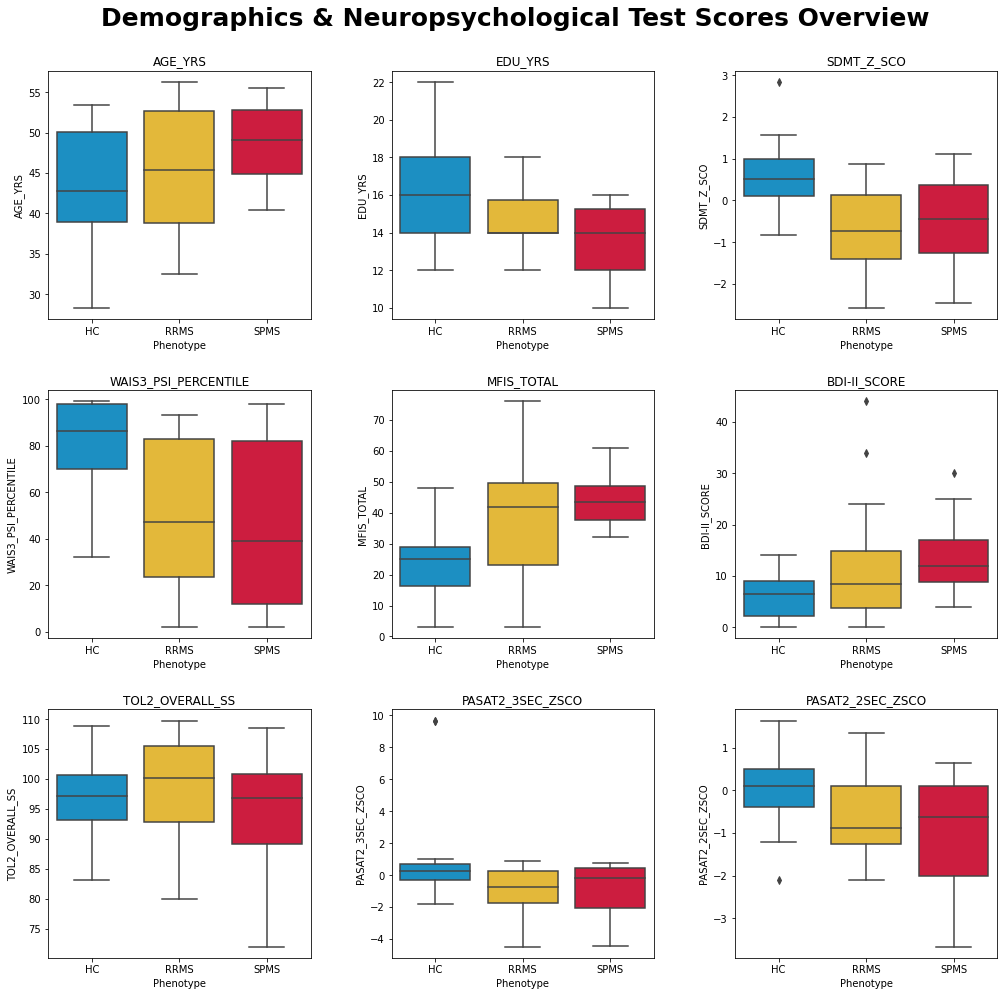

In [133]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDMT_Z_SCO', 'WAIS3_PSI_PERCENTILE', 'MFIS_TOTAL', 'BDI-II_SCORE', 'TOL2_OVERALL_SS', 'PASAT2_3SEC_ZSCO', 'PASAT2_2SEC_ZSCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.boxplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


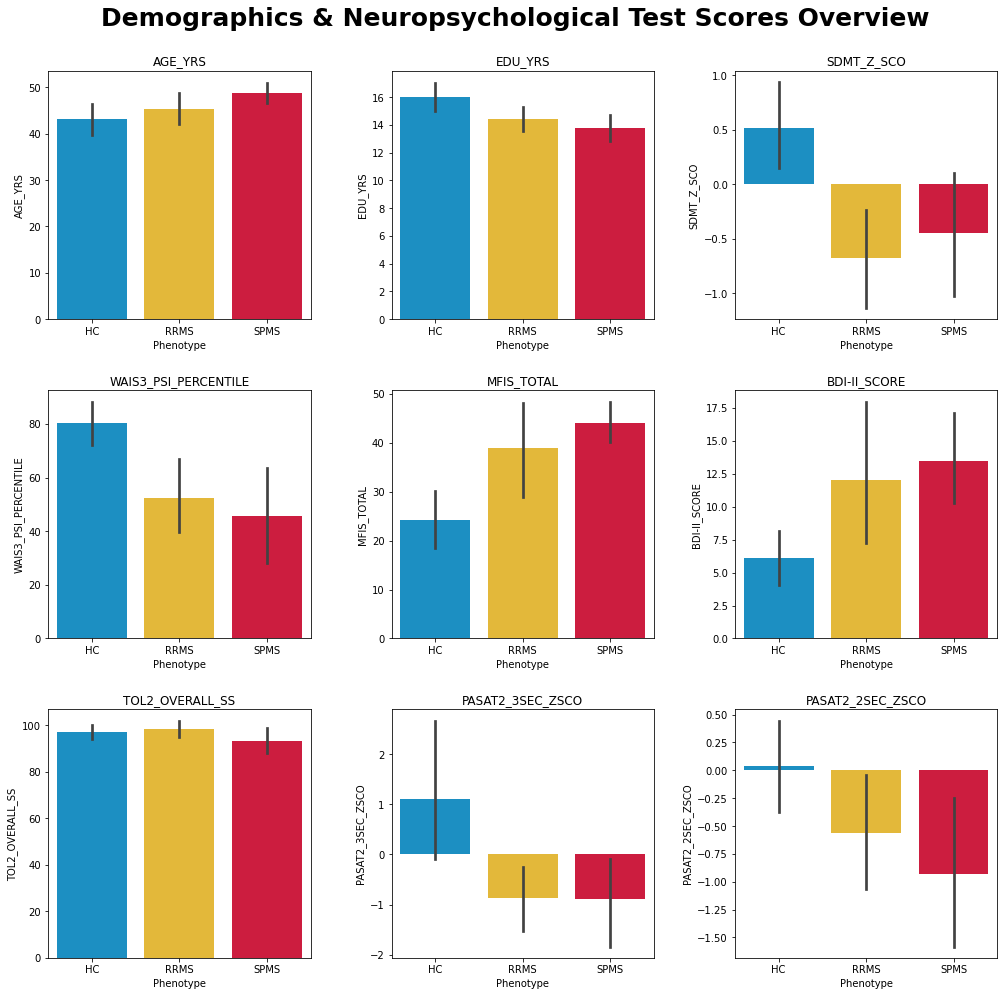

In [151]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDMT_Z_SCO', 'WAIS3_PSI_PERCENTILE', 'MFIS_TOTAL', 'BDI-II_SCORE', 'TOL2_OVERALL_SS', 'PASAT2_3SEC_ZSCO', 'PASAT2_2SEC_ZSCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


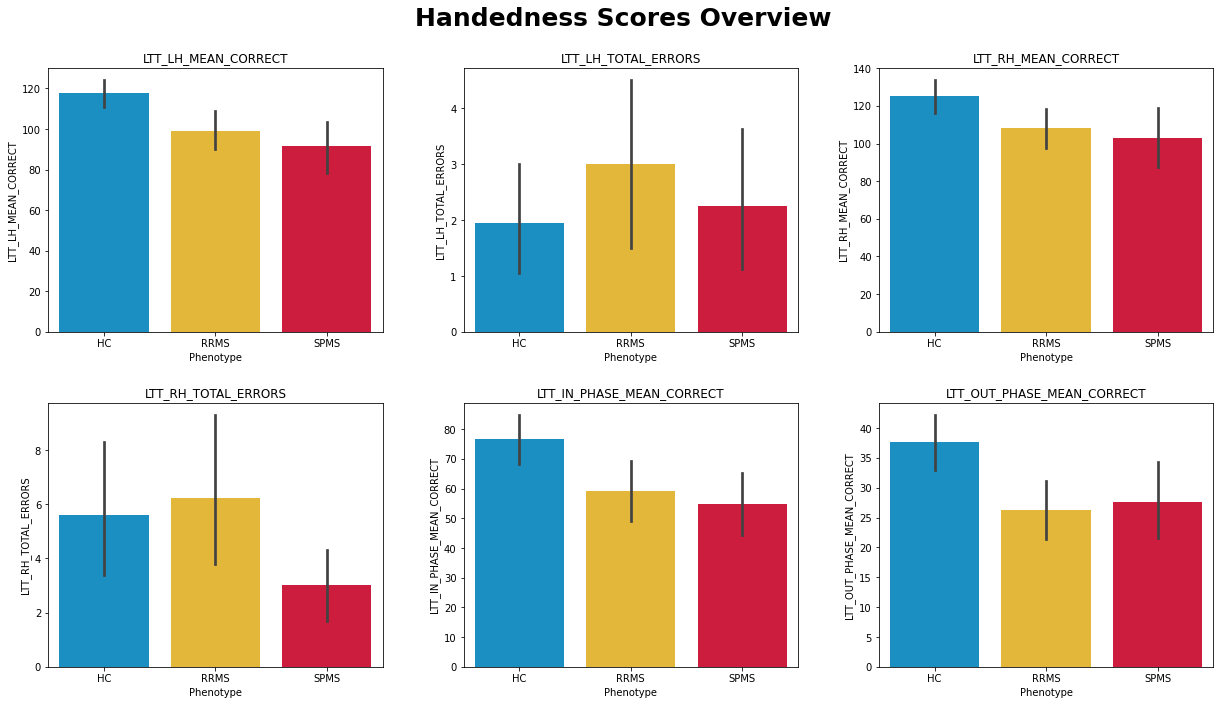

In [145]:
# handedness scores
handedness_metrics = ['LTT_LH_MEAN_CORRECT', 'LTT_LH_TOTAL_ERRORS',
       'LTT_RH_MEAN_CORRECT', 'LTT_RH_TOTAL_ERRORS',
       'LTT_IN_PHASE_MEAN_CORRECT', 'LTT_OUT_PHASE_MEAN_CORRECT']

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5)
fig.suptitle('Handedness Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(handedness_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=handedness_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(handedness_metrics[i])
    ax[i].set_xlabel('Phenotype')


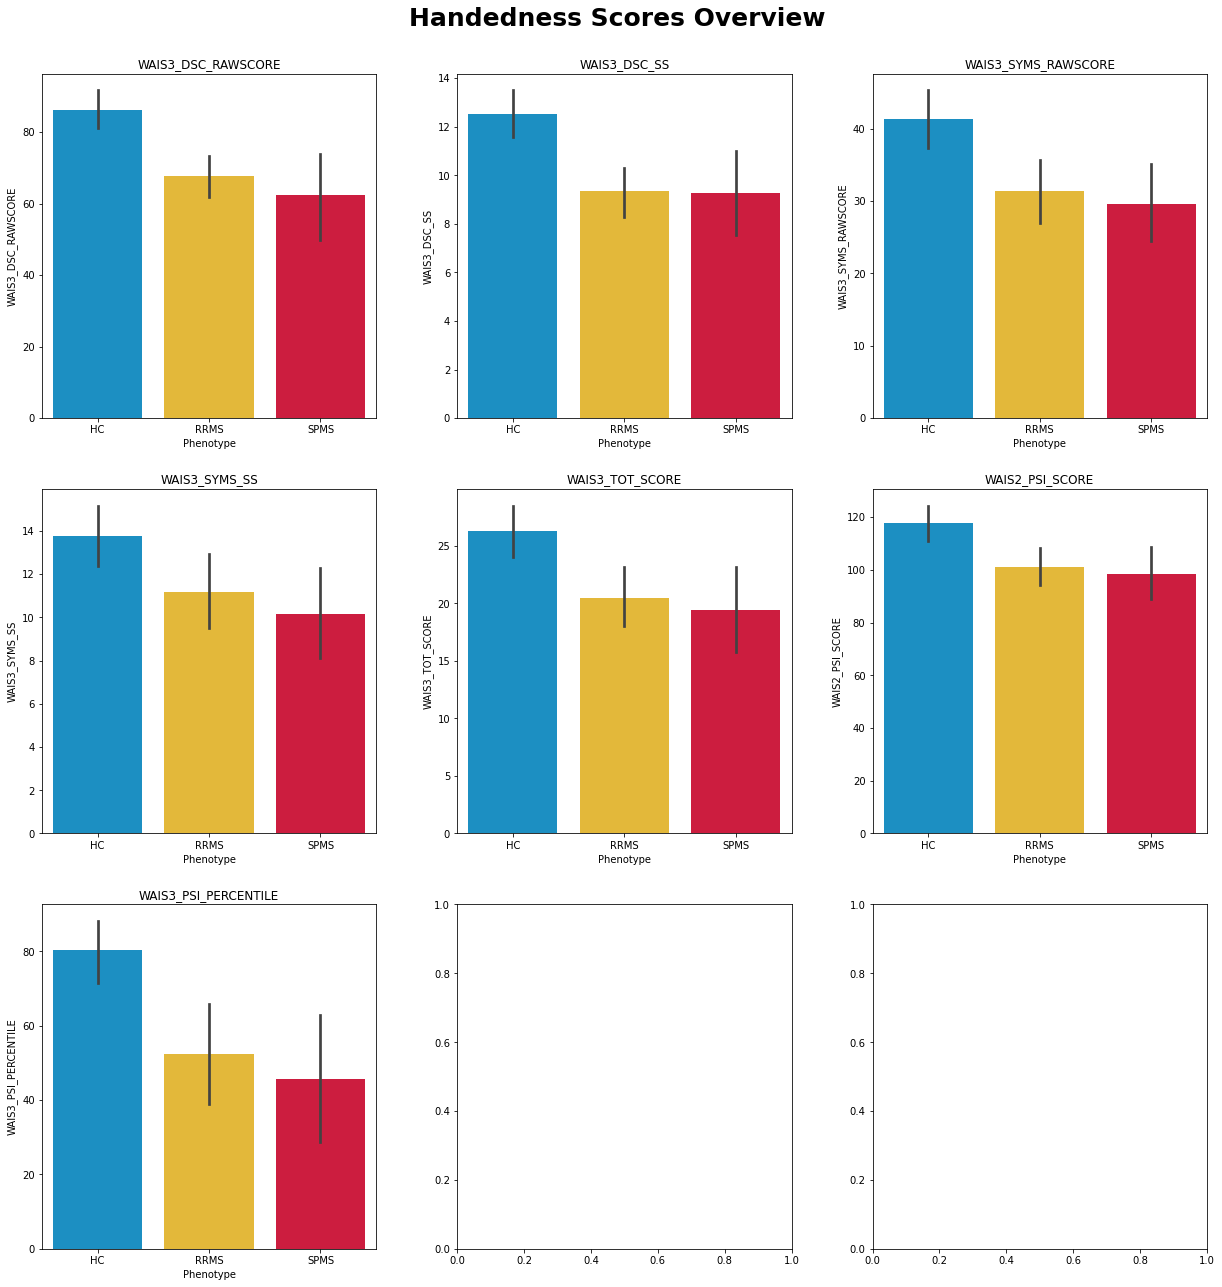

In [146]:
# WAIS3 subscores
wais3_metrics = ['WAIS3_DSC_RAWSCORE', 'WAIS3_DSC_SS', 'WAIS3_SYMS_RAWSCORE',
       'WAIS3_SYMS_SS', 'WAIS3_TOT_SCORE', 'WAIS2_PSI_SCORE',
       'WAIS3_PSI_PERCENTILE'] 

fig, ax = plt.subplots(3, 3, figsize=(18, 18))
fig.tight_layout(pad=5)
fig.suptitle('Handedness Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(wais3_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=wais3_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(wais3_metrics[i])
    ax[i].set_xlabel('Phenotype')


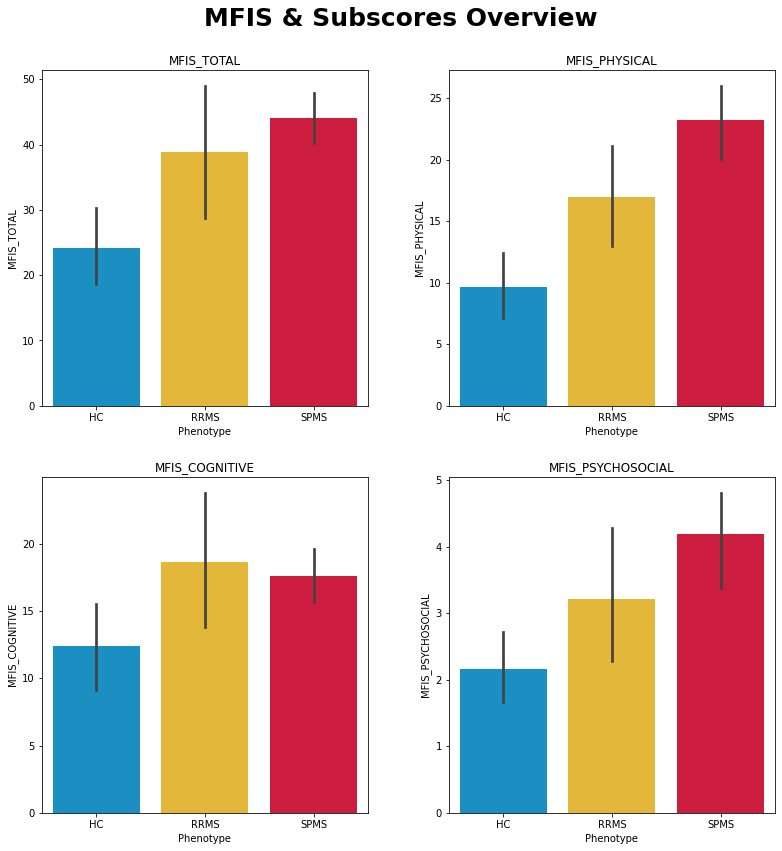

In [148]:
# MFIS subscores
MFIS_metrics = ['MFIS_TOTAL', 'MFIS_PHYSICAL', 'MFIS_COGNITIVE', 'MFIS_PSYCHOSOCIAL']


fig, ax = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(pad=5)
fig.suptitle('MFIS & Subscores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(MFIS_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=MFIS_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(MFIS_metrics[i])
    ax[i].set_xlabel('Phenotype')

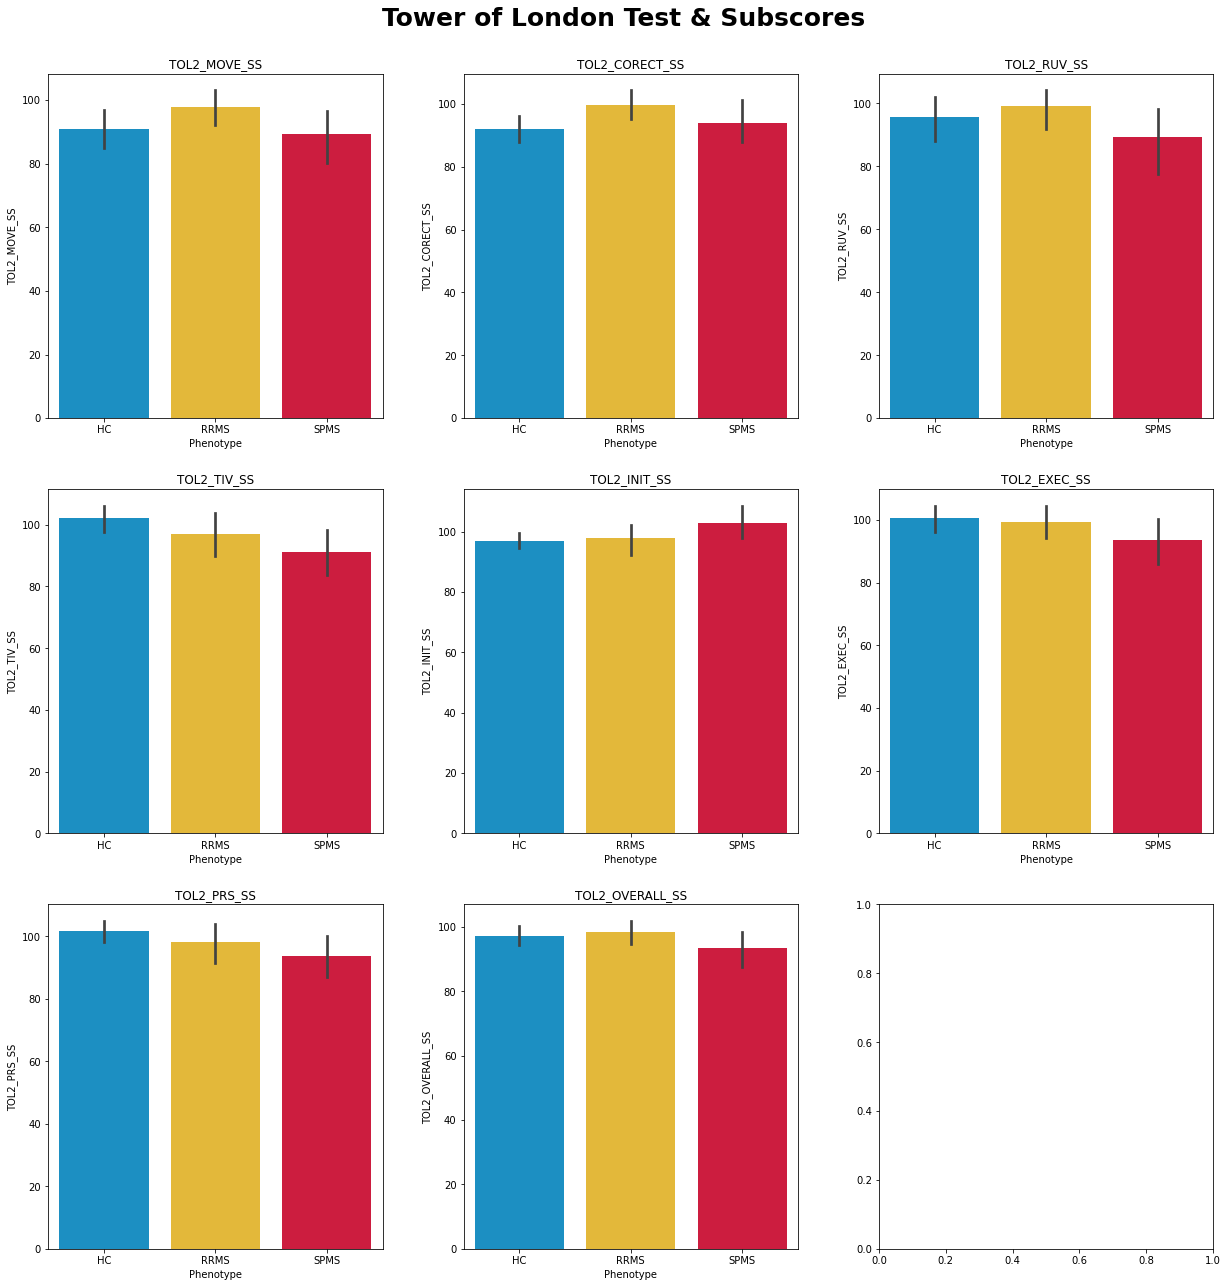

In [149]:
# TOL-2 subscores
TOL2_subscores = ['TOL2_MOVE_SS', 'TOL2_CORECT_SS', 'TOL2_RUV_SS', 'TOL2_TIV_SS', 'TOL2_INIT_SS',
       'TOL2_EXEC_SS', 'TOL2_PRS_SS', 'TOL2_OVERALL_SS']

fig, ax = plt.subplots(3,3, figsize=(18,18))
fig.tight_layout(pad=5)
fig.suptitle('Tower of London Test & Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(TOL2_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=TOL2_subscores[i], data=data, order=order, palette=palette)
    ax[i].set_title(TOL2_subscores[i])
    ax[i].set_xlabel('Phenotype')

In [91]:
# EDSS and subscores
filter_ms = ['MS_TYPE$', 'EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

EDSS_subscores = ['EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

In [117]:
df_MS_subgroup = df_neuropsych[df_neuropsych['GROUP$'] == "MS"]

# filter edss subscores only and delete rows containing NaNs
df_MS_subgroup = df_MS_subgroup[filter_ms]

# force datatypes to numeric
df_MS_subgroup[EDSS_subscores] = df_MS_subgroup[EDSS_subscores].apply(pd.to_numeric, errors='coerce')


# drop rows with nan values
df_MS_subgroup = df_MS_subgroup.dropna()
df_MS_subgroup

,MS_TYPE$,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,SPMS,3.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0
1,SPMS,5.5,1.0,1.0,4.0,3.0,3.0,2.0,1.0
2,RRMS,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,SPMS,6.5,1.0,2.0,5.0,3.0,3.0,1.0,1.0
4,SPMS,4.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0
7,RRMS,1.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,RRMS,2.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0
9,RRMS,3.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0
12,RRMS,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,RRMS,1.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [144]:
df_MS_subgroup['MS_TYPE$'].value_counts()

RRMS    15
SPMS    14
Name: MS_TYPE$, dtype: int64

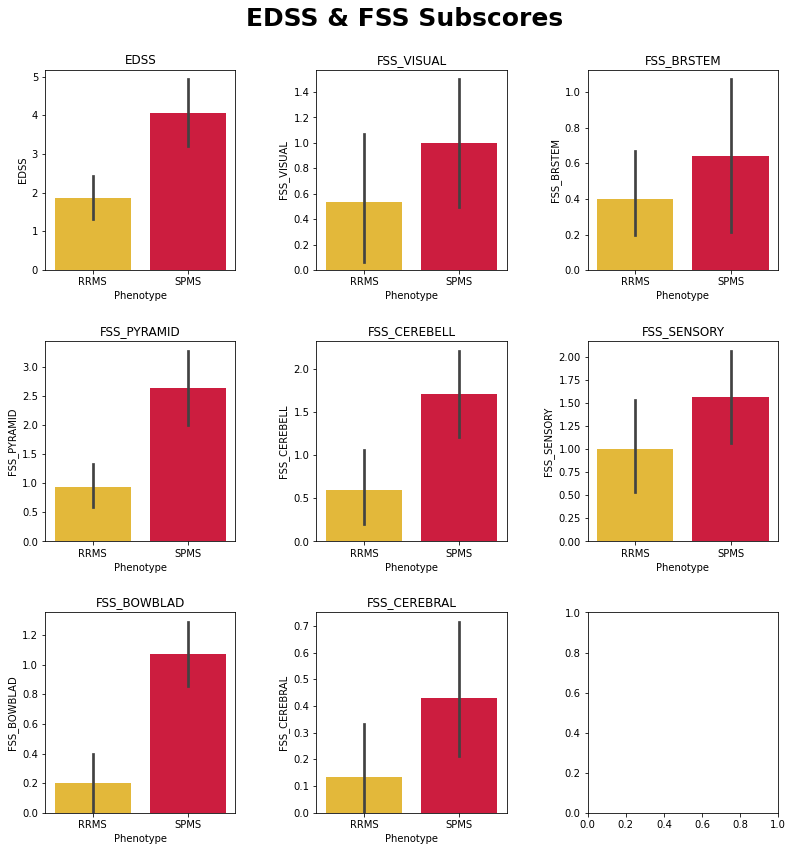

In [143]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.tight_layout(pad=5)
fig.suptitle('EDSS & FSS Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(EDSS_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=EDSS_subscores[i], data=df_MS_subgroup, order=['RRMS', 'SPMS'], palette=['#FFC61E', '#E9002D'])
    ax[i].set_title(EDSS_subscores[i])
    ax[i].set_xlabel('Phenotype')

# Functional Image Data 

In [ ]:
# Exploratory 